In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

# Teleportacja kwantowa

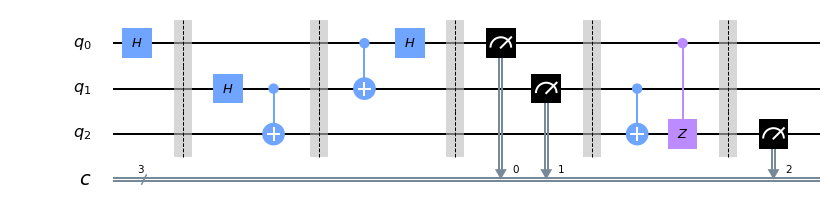

In [2]:
circ = QuantumCircuit(3,3)
# zmiana stanu q0
circ.h(0)
circ.barrier()
circ.h(1)
circ.cx(1,2)
# tworzenie stanu Bella
# q1 zostaje u Alicji
# q2 przesyłany do Bolka 
circ.barrier()
# Alicja dołącza q0 o nieznanym stanie do q1 z pary Bella
circ.cx(0,1)
circ.h(0)
circ.barrier()
# następnie Alicja wykonuje pomiar w bazie Bella
# w trakcie pomiaru q2 Bolka zmienił się
circ.measure(0,0)
circ.measure(1,1)
# Alicja przesyła bolkowi otrzymany wynik klasycznym kanałem komunikacyjnym
circ.barrier()
# Bolek stosuje odpowiednie bramki w zależności od tego co otrzymał od Alicji
circ.cx(1,2)
circ.cz(0,2)
# w wyniku tych operacji Bolek dostaje u siebie nieznany stan Alicji
circ.barrier()
circ.measure(2,2)
circ.draw()

{'100': 135, '000': 120, '111': 125, '010': 133, '101': 129, '001': 118, '110': 144, '011': 120}


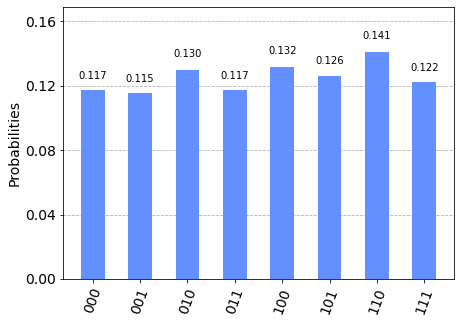

In [3]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
#histogram z symulatora pokozuje prawdopodobieństwo zaistnienia poszczególnych stanów
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)